<img style="margin-left: auto; margin-right: auto; width=50%" src="uproot-3.png"></img>

What's new?

   * modularization
   * writing files
   * jagged array operations

## Modularization

uproot 2 had been a single library (optionally depending on lz4).

<img style="margin-left: auto; margin-right: auto; width=80%" src="abstraction-layers-before.png"></img>

## Modularization

uproot 3 splits out everything that is not I/O. We'll see the advantage in a moment.

<img style="margin-left: auto; margin-right: auto; width=80%" src="abstraction-layers.png"></img>

## Writing files

uproot can now write histograms to files. It has the same dict-like interface:

In [1]:
import uproot
import numpy

f = uproot.recreate("tmp.root")                                  # instead of uproot.open
f["name"] = numpy.histogram(numpy.random.normal(0, 1, 100000))   # any kind of histogram

In [2]:
f["name"].show()                                                 # read it back out

                          0                                                35033
                          +----------------------------------------------------+
[-inf, -4.2381)     0     |                                                    |
[-4.2381, -3.3503)  43    |                                                    |
[-3.3503, -2.4625)  635   |*                                                   |
[-2.4625, -1.5747)  5096  |********                                            |
[-1.5747, -0.68683) 18775 |****************************                        |
[-0.68683, 0.20099) 33365 |**************************************************  |
[0.20099, 1.0888)   28422 |******************************************          |
[1.0888, 1.9766)    11289 |*****************                                   |
[1.9766, 2.8645)    2194  |***                                                 |
[2.8645, 3.7523)    176   |                                                    |
[3.7523, 4.6401)    5     | 

In [3]:
import ROOT
c = ROOT.TCanvas()

Welcome to JupyROOT 6.14/04


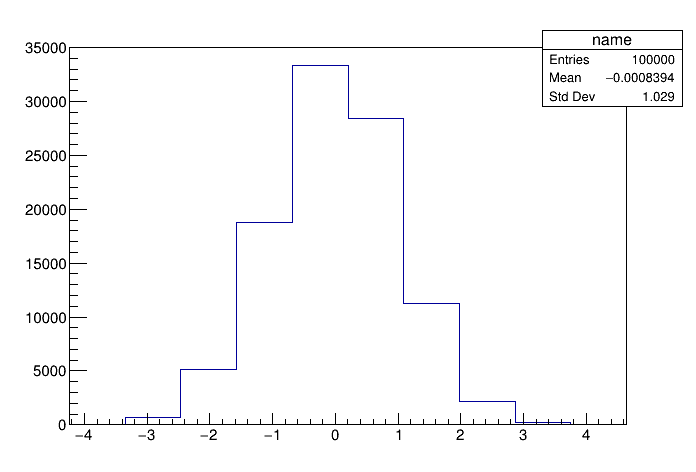

In [4]:
f = ROOT.TFile("tmp.root")                    # ROOT can read it, too
h = f.Get("name")
h.Draw()
c.Draw()

In [5]:
f = ROOT.TFile("tmp.root", "UPDATE")          # ROOT can add to the same file
h = ROOT.TH1D("another", "", 10, -5, 5)
for x in numpy.random.normal(0, 1, 100000):
    h.Fill(x)
h.Write()
f.Close()

In [6]:
f = uproot.open("tmp.root")
f["another"].show()

                 0                                                         35937
                 +-------------------------------------------------------------+
[-inf, -5) 1     |                                                             |
[-5, -4)   1     |                                                             |
[-4, -3)   147   |                                                             |
[-3, -2)   2162  |****                                                         |
[-2, -1)   13488 |***********************                                      |
[-1, 0)    34031 |**********************************************************   |
[0, 1)     34226 |**********************************************************   |
[1, 2)     13722 |***********************                                      |
[2, 3)     2079  |****                                                         |
[3, 4)     140   |                                                             |
[4, 5)     3     |          

uproot could become a clearinghouse for histograms from different libraries.

In [7]:
%matplotlib inline
import physt

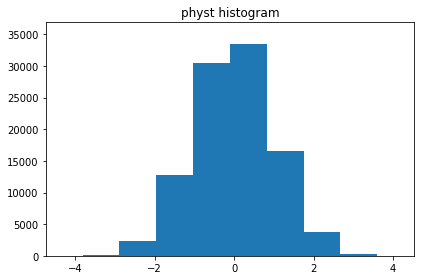

In [8]:
h = physt.h1(numpy.random.normal(0, 1, 100000), name="physt histogram")
h.plot()

In [9]:
f = uproot.recreate("tmp.root")
f["name"] = h

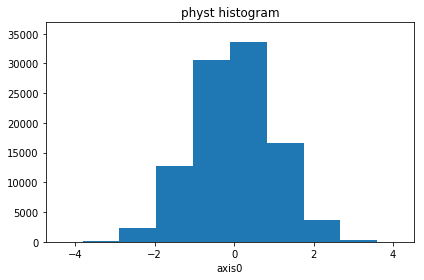

In [10]:
f = uproot.open("tmp.root")
f["name"].physt().plot()

In [11]:
f["name"].numpy()

(array([   13,   198,  2332, 12708, 30533, 33550, 16573,  3713,   361,
           19], dtype=int32),
 array([-4.74395789, -3.81686954, -2.8897812 , -1.96269285, -1.0356045 ,
        -0.10851616,  0.81857219,  1.74566053,  2.67274888,  3.59983723,
         4.52692557]))

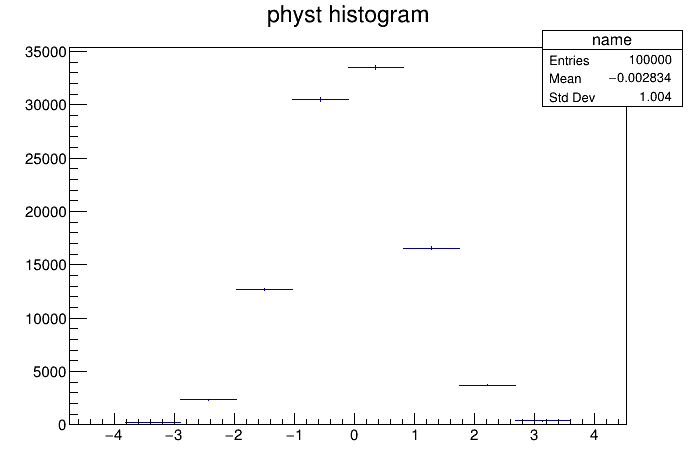

In [12]:
f = ROOT.TFile("tmp.root")
h = f.Get("name")
h.Draw()
c.Draw()

As well as new ways of looking at histograms.

In [13]:
f = uproot.open("tmp.root")
print(f["name"].hepdata())      # YAML format for the HEPData archival site

dependent_variables:
- header: {name: counts, units: null}
  qualifiers: []
  values:
  - errors:
    - {label: stat, symerror: 3.605551275463989}
    value: 13.0
  - errors:
    - {label: stat, symerror: 14.071247279470288}
    value: 198.0
  - errors:
    - {label: stat, symerror: 48.29078587059855}
    value: 2332.0
  - errors:
    - {label: stat, symerror: 112.72976536833562}
    value: 12708.0
  - errors:
    - {label: stat, symerror: 174.73694514898673}
    value: 30533.0
  - errors:
    - {label: stat, symerror: 183.16659084014202}
    value: 33550.0
  - errors:
    - {label: stat, symerror: 128.73616430514}
    value: 16573.0
  - errors:
    - {label: stat, symerror: 60.93439094632849}
    value: 3713.0
  - errors:
    - {label: stat, symerror: 19.0}
    value: 361.0
  - errors:
    - {label: stat, symerror: 4.358898943540674}
    value: 19.0
independent_variables:
- header: {name: physt histogram, units: null}
  values:
  - {high: -3.8168695411394657, low: -4.743957886913747}


Including this idea I've been working on that Pandas DataFrames with an interval index _are_ histograms (DataFrame ↔ histogram in both directions). In fact, they're sparse histograms and handle sparse operations correctly.

In [15]:
f = uproot.open("tmp.root")
h = f["name"].pandas()
h

,count,variance
"[-4.743957886913747, -3.8168695411394657)",13,13.0
"[-3.8168695411394657, -2.8897811953651846)",198,198.0
"[-2.8897811953651846, -1.962692849590903)",2332,2332.0
"[-1.962692849590903, -1.035604503816622)",12708,12708.0
"[-1.035604503816622, -0.10851615804234083)",30533,30533.0
"[-0.10851615804234083, 0.8185721877319407)",33550,33550.0
"[0.8185721877319407, 1.7456605335062214)",16573,16573.0
"[1.7456605335062214, 2.672748879280503)",3713,3713.0
"[2.672748879280503, 3.5998372250547837)",361,361.0
"[3.5998372250547837, 4.526925570829066)",19,19.0


In [16]:
f = uproot.recreate("tmp.root")
f["another"] = h